# Behavioral Cloning 

This notebook is used for development. Final model and processing will be within model.py. 

# Part 1: Data Processing 

### Importing Packages:

In [1]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

import cv2
import math

from scipy import signal
import sklearn
import csv

print('Pacakages Imported')

Pacakages Imported


## Loading Data:

Because of how large the data file is for the training data, I have the data saved outside of this workspace. 

In [25]:
# Set CSV Path
csv_path = '../udacity-track1-data/driving_log.csv'

# Read Data from CSV File
data_full = pd.read_csv(csv_path, 
                        index_col = False)
data_full['direction'] = pd.Series('s', index=data_full.index)

# Column Labels: ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']

print('Sucessfully accessed csv file')

Sucessfully accessed csv file


In [26]:
## Print out information:
num_frames = data_full.shape[0]

print('Number of Image Frames (Left, Center, Right Images):', num_frames)


Number of Image Frames (Left, Center, Right Images): 8036


## Plot Steering, Throttle, Break, Speed Over Time

In [30]:
def plotData(data_plot, plot_len, ax1, ax2, y_min, y_max, title, width, height):
    
    if plot_len == None:
        plot_len = len(data_plot)
    
    t = np.arange(len(data_plot))
    x = data_plot

    fig = plt.figure(figsize=(width, height))

    plt.plot(t[0:plot_len],x[0:plot_len]);
    plt.xlabel(ax1)
    plt.ylabel(ax2)
    plt.title(title)
    plt.ylim(y_min,y_max)

    return fig

### Steering vs. Time

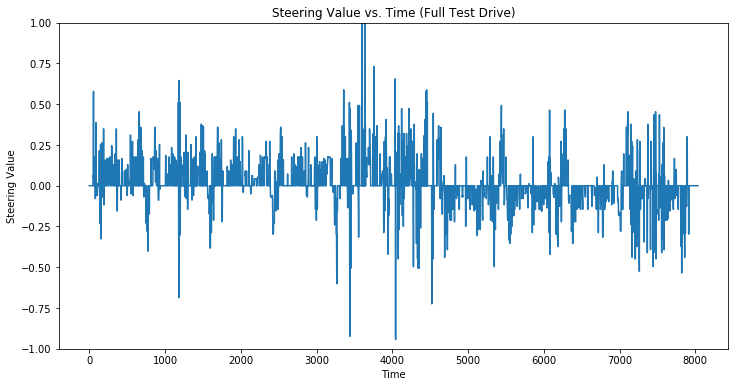

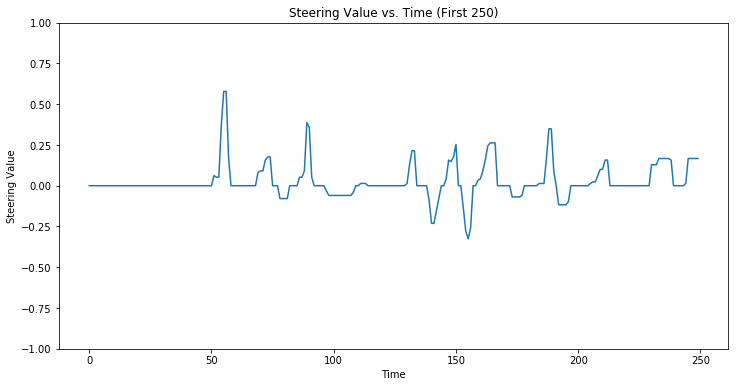

In [33]:
## Steering Range: -1 to 1

# Was accidentally including the first row with strings if header was set to false when loading the csv data
#print(type(data_full.steering))
#print(data_full.steering)

data_steer = np.array(data_full.steering,dtype=np.float32)

data_plot = data_steer
ax1 = "Time"
ax2 = "Steering Value"
y_min, y_max = -1, 1
title = "Steering Value vs. Time (Full Test Drive)"
width, height = 12, 6

# plot full range: 
fig1 = plotData(data_plot, None, ax1, ax2, y_min, y_max, title, width, height)

# plot small range:
plot_len = 250
title = "Steering Value vs. Time (First 250)"
fig2 = plotData(data_plot, plot_len, ax1, ax2, y_min, y_max, title, width, height)

## Save Images 
save_on = False 

if save_on:
    fig1.savefig('./notebook_images/steering_vs_time_full.png') # save the figure to file
    fig2.savefig('./notebook_images/steering_vs_time_partial.png') # save the figure to file

### Throttle vs. Time

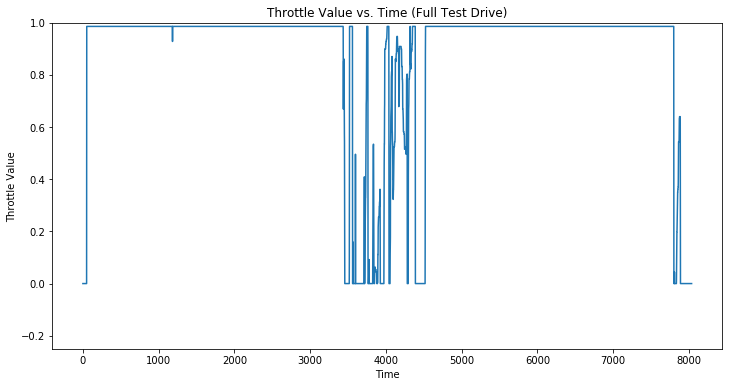

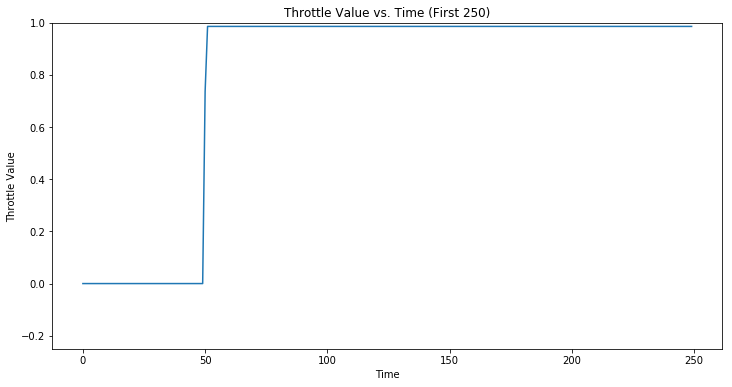

In [41]:
## Throttle Range: 0 to 1

data_throttle = np.array(data_full.throttle,dtype=np.float32)

data_plot = data_throttle
ax1 = "Time"
ax2 = "Throttle Value"
y_min, y_max = -0.25, 1
title = "Throttle Value vs. Time (Full Test Drive)"
width, height = 12, 6

# plot full range: 
fig1 = plotData(data_plot, None, ax1, ax2, y_min, y_max, title, width, height)

# plot small range:
plot_len = 250
title = "Throttle Value vs. Time (First 250)"
fig2 = plotData(data_plot, plot_len, ax1, ax2, y_min, y_max, title, width, height)

## Save Images 
save_on = True 

if save_on:
    fig1.savefig('./notebook_images/throttle_vs_time_full.png') # save the figure to file
    fig2.savefig('./notebook_images/throttle_vs_time_partial.png') # save the figure to file

### Brake vs. Time

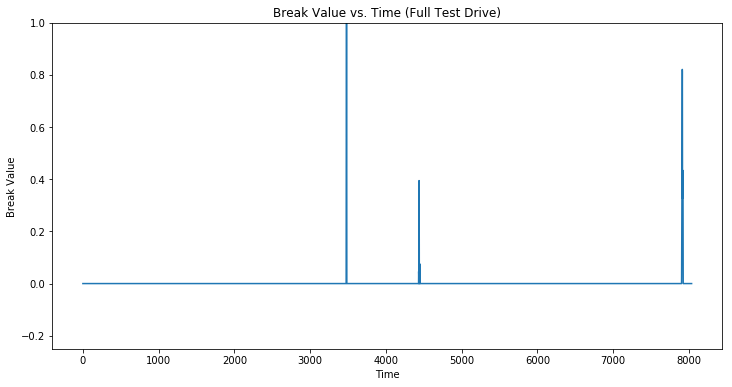

In [42]:
## Brake Range: 0 to 1

data_brake = np.array(data_full.brake,dtype=np.float32)

data_plot = data_brake
ax1 = "Time"
ax2 = "Break Value"
y_min, y_max = -0.25, 1
title = "Break Value vs. Time (Full Test Drive)"
width, height = 12, 6

# plot full range: 
fig1 = plotData(data_plot, None, ax1, ax2, y_min, y_max, title, width, height)

## Save Images 
save_on = True 

if save_on:
    fig1.savefig('./notebook_images/break_vs_time_full.png') # save the figure to file

### Speed vs. Time

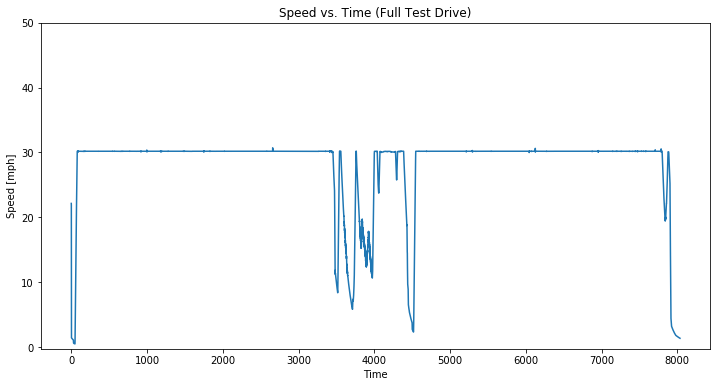

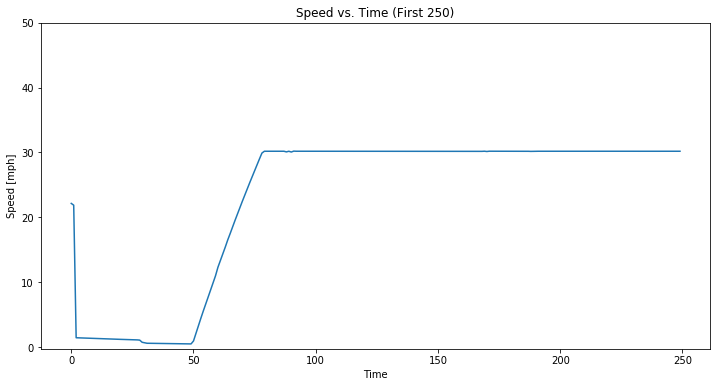

In [44]:
## Speed Range: 0 to 30
data_speed = np.array(data_full.speed,dtype=np.float32)

data_plot = data_speed
ax1 = "Time"
ax2 = "Speed [mph]"
y_min, y_max = -0.25, 50
title = "Speed vs. Time (Full Test Drive)"
width, height = 12, 6

# plot full range: 
fig1 = plotData(data_plot, None, ax1, ax2, y_min, y_max, title, width, height)

# plot small range:
plot_len = 250
title = "Speed vs. Time (First 250)"
fig2 = plotData(data_plot, plot_len, ax1, ax2, y_min, y_max, title, width, height)

## Save Images 
save_on = True 

if save_on:
    fig1.savefig('./notebook_images/speed_vs_time_full.png') # save the figure to file
    fig2.savefig('./notebook_images/speed_vs_time_partial.png') # save the figure to file

Because I will only be training for steering angle, I care most about that. Still, from these plots, I can see that the essentially the break was never used, speed is at a maximum until around midway through, which is probably during sections of the track where there is heavy turning. The throttle value also corroborates with the speed value.

## Showing Random Images

Before I do any data processing, I will show some random frames just for a reference. 

In [ ]:
# Define a image function loading the input image. 
# *Note, will not normalize the image input until put image through pipeline. No point in doing it until then. 
def getImg(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

# This function adds to the path in the csv file so you can actually access an image. 
def getPath(local_path):
    filename = local_path.split("/")[-1]
    host_path = '../udacity-track1-data/IMG'+filename               # CHANGE HOST PATH SUBSTRING 1 AS NEEDED 
    # print(host_path) 
    return host_path

In [ ]:
# Plot 3 random frames: Center, Left, and Right Images
def plotN_rand_frames(N,data, width, height)
    B = np.ones(len(features))
    
    fig = plt.figure(figsize = (width,height))
    
    n_frames = data.shape[0]

    for i in range(N):
        
        # pick random frame from data for center, left, and right image. 
        rand_img_num = random.randint(0,n_frames-1)
        
        # extract random frame images
        img_center = getImg(getPath(data['center'][rand_img_num].strip()))
        img_left = getImg(getPath(data['left'][rand_img_num].strip()))
        img_right = getImg(getPath(data['right'][rand_img_num].strip()))

        # Plot Left 
        plt.subplot(N,3,i+1)
        plt.imshow(img_left) 
        plt.text(2,4,str(rand_img_num), color='k',backgroundcolor='m')
        plt.title('Left Image')
        plt.axis('off')
        
        # Plot Center 
        plt.subplot(N,3,i+2)
        plt.imshow(img_center) 
        plt.text(2,4,str(rand_img_num), color='k',backgroundcolor='m')
        plt.title('Center Image')
        plt.axis('off')
        
        # Plot Left 
        plt.subplot(N,3,i+3)
        plt.imshow(img_right) 
        plt.text(2,4,str(rand_img_num), color='k',backgroundcolor='m')
        plt.title('Center Image')
        plt.axis('off')
        
    return fig